In [2]:
import numpy as np
import os
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier  
os.chdir("C:/Users/ekorkmaz/Desktop/EnkTelefonYedek/kodluyoruz/3.hafta") 

In [3]:
diabetes=pd.read_csv("hmelq.csv")
df=diabetes.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


# Logistic regression

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [5]:
df["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

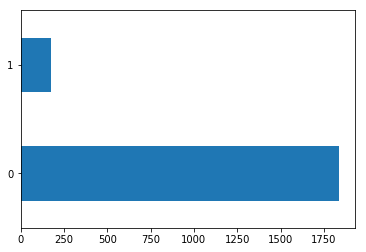

In [6]:
df["bad"].value_counts().plot.barh() # plot.bar dikey grafiktir, plot.barh yatay grafiktir.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [89]:
y = df['bad']
X = df.drop(['bad'], axis = 1)
X=pd.get_dummies(X)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


# statsmodels ile modelleme

In [90]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()
# p değerinin alpha'dan küçük olduğu değerler bizim için y yi aciklama da anlam ifade etmektedir. 

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Sat, 21 Sep 2019   Pseudo R-squ.:                  0.2346
Time:                        22:17:29   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938   2.64e+07  -1.44e-07      1.000   -5.17e+07    5.17e+07
reason_HomeImp    -3.8593   2.64e+07  -1.46e-07      1.000   -5.17e+07    5.17e+07
job_Mgr           -1.4722   2.64e+07  -5.58e-08      1.000   -5.17e+07    5.17e+07
job_Office        -2.0716   2.64e+07  -7.86e-08      1.000   -5.17e+07    5.17e+07
job_Other         -1.5260   2.64e+07  -5.79e-08      1.000   -5.17e+07    5.17e+07
job_ProfEx        -1.5377   2.64e+07  -5.83e-08      1.000   -5.17e+07    5.17e+07
job_Sales         -0.2487   2.64e+07  -9.43e-09      1.000   -5.17e+07    5.17e+07
job_Self          -0.7970   2.64e+07  -3.02e-08      1.000   -5.17e+07    5.17e+07
==================================================================================
"""

# scikit-learn -  bir de scikitlearn ile modelleyelim

In [91]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")

X = X.drop(['loan','mortdue','value','yoj','reason_DebtCon','reason_HomeImp','job_Mgr','job_Office','job_Other','job_ProfEx','job_Sales','job_Self'],axis=1)
loj_model=loj.fit(X,y)
loj_model
#liblinear algoritma

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
loj_model.intercept_

array([-4.30376684])

In [93]:
loj_model.coef_

array([[ 0.59979687,  0.73321048, -0.00540006,  0.08741424, -0.03544782,
         0.08599255]])


# Tahmin ve Model tuning

In [126]:
y_pred = loj_model.predict(X)
    

In [95]:
y_pred = loj_model.predict(X)
confusion_mat = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Counfusion matrix: \n",confusion_mat)
print("\n Accuracy: ",accuracy)

Counfusion matrix: 
 [[1831    9]
 [ 143   35]]

 Accuracy:  0.9246778989098117


In [96]:
print("Acuracy:",(35+1831)/2018)          # Accuracy : (TP+TN) / total  modelin genel dogruluk 
print("Misclasification",(9+143)/2018)    # Missclassification rate(recall yada sensivity) : (FP+FN) / total      
print("True positive rate",35/178)        # TP Rate : TP/actual yes 
print("precision",35/44)                  # Precision: TP / predicted yes  
print("F score",((35/178)+(35/44))/2)     # (Tp+Precision)/2
#benim icin 1 leri mi tahmin etmek önemli yoksa 0 larımı ona göre bu parametrelerden hangisi iyiyse onu seçerim 
#ama accuracy e de bakarım genelolarak bi 

Acuracy: 0.9246778989098117
Misclasification 0.0753221010901883
True positive rate 0.19662921348314608
precision 0.7954545454545454
F score 0.49604187946884576


In [97]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1840
           1       0.80      0.20      0.32       178

   micro avg       0.92      0.92      0.92      2018
   macro avg       0.86      0.60      0.64      2018
weighted avg       0.92      0.92      0.90      2018



#presicion 0 dediklerimizin %79 ü dogru(0 dediğimiz precisiıonların gerçekte de degeri 0 yani )
#recal sıfırların yüzde %90 doğru tahmin yapıyor 1 lerde %55
#f1 score overal olarak 0'ları %84 doğru tahmin ediyor


In [98]:
loj_model.predict(X)[0:10]
# X verileri ile tahmin etme (X = df.drop(['Outcome'], axis = 1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [99]:
loj_model.predict_proba(X)[0:10]
# 0 olma ve 1 olma ihtimallerini(olasılıgını) veriyor
#sağ 1 olma ihtimali sol 0 olma ihtimalidir. aşağıdakiler 0,50 trashholdu içindir. trashold değiştirilebilir bu arada

array([[0.94595761, 0.05404239],
       [0.84604041, 0.15395959],
       [0.85255757, 0.14744243],
       [0.86010494, 0.13989506],
       [0.91705827, 0.08294173],
       [0.93958986, 0.06041014],
       [0.96161392, 0.03838608],
       [0.96126402, 0.03873598],
       [0.88599036, 0.11400964],
       [0.97446522, 0.02553478]])

In [100]:
# gerçek y değerlerim;
y[0:10]


153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [101]:
# gerçek y değerlerim ile yukarıdaki tahmin değerleri  ile kıyaslamak için;
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]
# değerlerin 1 olma olasılıkları

array([0.05404239, 0.15395959, 0.14744243, 0.13989506, 0.08294173,
       0.06041014, 0.03838608, 0.03873598, 0.11400964, 0.02553478])

In [102]:
# changing treshold of the predicting model
y_pred = [1 if i > 0.7 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [103]:
confusion_matrix(y,y_pred)

array([[1840,    0],
       [ 155,   23]], dtype=int64)

In [104]:
accuracy_score(y,y_pred)

0.923191278493558

In [105]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1840
           1       1.00      0.13      0.23       178

   micro avg       0.92      0.92      0.92      2018
   macro avg       0.96      0.56      0.59      2018
weighted avg       0.93      0.92      0.90      2018



In [106]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.05404239, 0.15395959, 0.14744243, 0.13989506, 0.08294173])

In [107]:
#roc curve ün 1e yakın olmasını bekliyoruz modelin doğruluğunu test ediyoruz bunlar ne kadar fit ediyor
logit_roc_auc=roc_auc_score(y,loj_model.predict(X))
logit_roc_auc

0.5958689545676599

In [108]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])

fpr:  [0.         0.         0.         0.00108696 0.00108696 0.00217391
 0.00217391 0.00271739 0.00271739 0.00543478]
tpr:  [0.         0.00561798 0.12921348 0.12921348 0.15168539 0.15168539
 0.15730337 0.15730337 0.19662921 0.19662921]
thresholds:  [1.99963644 0.99963644 0.72302555 0.68878706 0.66981111 0.644311
 0.63431299 0.63039984 0.52925964 0.48258788]


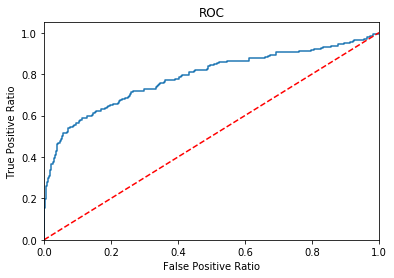

In [125]:
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC')
plt.show()

#iyi bir modelde mavinin altında kalan alanın 1 olması gerekiyor
#güzel bi modelde roc curve başlarda pik yapar sonra sabitlenip converge eder
#ödev de bad i modelliycez acuracy ve predictioni modelle anlamsız olanları at 


In [120]:
y=df["bad"]
X = df.drop(['bad'], axis = 1)
X=pd.get_dummies(X)
X = X.drop(['loan','mortdue','value','yoj','reason_DebtCon','reason_HomeImp','job_Mgr','job_Office','job_Other','job_ProfEx','job_Sales','job_Self'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [121]:
loj=LogisticRegression(solver="liblinear")  #lojistik model kurduk
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
accuracy_score(y_test,loj_model.predict(X_test))#gerçek degelr ile modelden gelen tahmin degerlerinin kıyasladık

0.9240924092409241

In [123]:
y_predict=loj_model.predict(X_test)
accuracy_score(y_test,y_predict)#ustteki kodun alternatifi

0.9240924092409241

In [124]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       554
           1       0.80      0.15      0.26        52

   micro avg       0.92      0.92      0.92       606
   macro avg       0.86      0.58      0.61       606
weighted avg       0.92      0.92      0.90       606



## overall da 0.92 tahmin etmişş 